In [19]:
import brainpy as bp
import matplotlib.pyplot as plt

# ABC system

In [36]:
import brainpy.math as bm

k1 = 1; k2 = 1; k3 = 1; r_a = 1; r_c = 1; a_tild = 2; c_tild = 4

def f_sys(A, B, C, t):
    return k1*(B - A) + k2*(0.5*B**2 - A*B) - r_a*A + r_a*a_tild, k1*(A - B) + k2*(A*B - 0.5*B**2) + k3*C - k3*B, k3*B - k3*C - r_c*C + r_c*c_tild

def g_sys(A, B, C, t):
    V = 1000
    dA = (bm.sqrt(k1*B) - bm.sqrt(k1*A) + 0.5*bm.sqrt(k2*B**2) - bm.sqrt(k2*A*B) - bm.sqrt(r_a*A) + bm.sqrt(r_a*a_tild)) / bm.sqrt(V)
    dB = (bm.sqrt(k1*A) - bm.sqrt(k1*B) + bm.sqrt(k2*A*B) - 0.5*bm.sqrt(k2*B**2) + bm.sqrt(k3*C) - bm.sqrt(k3*B)) / bm.sqrt(V)
    dC = (bm.sqrt(k3*B) - bm.sqrt(k3*C) - bm.sqrt(r_c*C) + bm.sqrt(r_c*c_tild)) / bm.sqrt(V)
    return dA, dB, dC

abc_system = bp.sdeint(f = f_sys, g = g_sys, intg_type=bp.integrators.ITO_SDE, wiener_type=bp.integrators.SCALAR_WIENER)

runner = bp.IntegratorRunner(abc_system, monitors=['A', 'B', 'C'], inits=[1., 2., 3.], dt=0.01)
runner.run(10)

  0%|          | 0/1000 [00:00<?, ?it/s]

/var/folders/2h/xz8d592j62n7f363_sbw7ly00000gn/T/ipykernel_42865/127881054.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


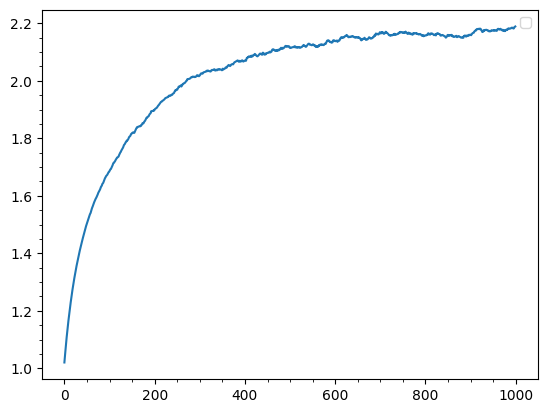

In [37]:
plt.plot(runner.mon.A[:, 0])
# plt.plot(runner.mon.B[:, 0])
# plt.plot(runner.mon.C[:, 0])
plt.legend()
plt.minorticks_on()
# plt.xlim(10e-3, 10e5)
# plt.xscale('log')
plt.show()